In [1]:
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from plotnine import *

from sklearn.preprocessing import StandardScaler # z score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score 


In [2]:
df = pd.read_csv("Analytics.csv")
df.head()

Page    Pageviews Unique Pageviews Avg. Time on Page   Entrances  \
0       (other)  101,970,728       95,984,124           0:02:21  55,403,206   
1         /home   29,515,323        9,488,672           0:04:25   8,763,470   
2  /bangla/home    4,790,426        1,343,430           0:04:34     722,376   
3      /english    3,927,273        1,094,822           0:06:33     354,092   
4     /business      845,531          570,445           0:01:22     119,162   

  Bounce Rate  % Exit Page Value  
0      61.80%  57.92%     <$0.01  
1      25.30%  17.81%     $0.05   
2      35.76%  14.40%     $0.06   
3      27.89%  12.11%     $1.00   
4      37.46%  24.55%     $0.02

In [3]:
df.describe().to_csv('abd.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Page               500 non-null    object
 1   Pageviews          500 non-null    object
 2   Unique Pageviews   500 non-null    object
 3   Avg. Time on Page  500 non-null    object
 4   Entrances          500 non-null    object
 5   Bounce Rate        500 non-null    object
 6   % Exit             500 non-null    object
 7   Page Value         500 non-null    object
dtypes: object(8)
memory usage: 31.4+ KB


In [5]:
df.drop(['Page'],axis = 'columns', inplace = True)
df.head()

Pageviews Unique Pageviews Avg. Time on Page   Entrances Bounce Rate  \
0  101,970,728       95,984,124           0:02:21  55,403,206      61.80%   
1   29,515,323        9,488,672           0:04:25   8,763,470      25.30%   
2    4,790,426        1,343,430           0:04:34     722,376      35.76%   
3    3,927,273        1,094,822           0:06:33     354,092      27.89%   
4      845,531          570,445           0:01:22     119,162      37.46%   

   % Exit Page Value  
0  57.92%     <$0.01  
1  17.81%     $0.05   
2  14.40%     $0.06   
3  12.11%     $1.00   
4  24.55%     $0.02

In [6]:
'''#df['Pageviews','Unique Pageviews','Avg. Time on Page','Entrances','Bounce Rate','% Exit','Page Value'] = df['Pageviews', 'Unique Pageviews','Avg. Time on Page','Entrances','Bounce Rate' ,'% Exit','Page Value'].astype(float)
#df['Pageviews'] = df['Pageviews'].astype(float)
df['Pageviews'] = pd.to_numeric(df['Pageviews'], errors='coerce')
df['Unique Pageviews'] = pd.to_numeric(df['Unique Pageviews'],errors = 'coerce')
df['Avg. Time on Page'] = pd.to_numeric(df['Avg. Time on Page'],errors = 'coerce')
df['Entrances'] = pd.to_numeric(df['Entrances'],errors = 'coerce')
df['Bounce Rate'] = pd.to_numeric(df['Bounce Rate'],errors = 'coerce')
df['% Exit'] = pd.to_numeric(df['% Exit'],errors = 'coerce')
df['Page Value'] = pd.to_numeric(df['Page Value'],errors = 'coerce')'''

data  = df.replace('[^\d.]', '', regex = True).astype(float)
data.head().to_csv('cc.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pageviews          500 non-null    float64
 1   Unique Pageviews   500 non-null    float64
 2   Avg. Time on Page  500 non-null    float64
 3   Entrances          500 non-null    float64
 4   Bounce Rate        500 non-null    float64
 5   % Exit             500 non-null    float64
 6   Page Value         500 non-null    float64
dtypes: float64(7)
memory usage: 27.5 KB


In [8]:
data.isnull().sum()

Pageviews            0
Unique Pageviews     0
Avg. Time on Page    0
Entrances            0
Bounce Rate          0
% Exit               0
Page Value           0
dtype: int64

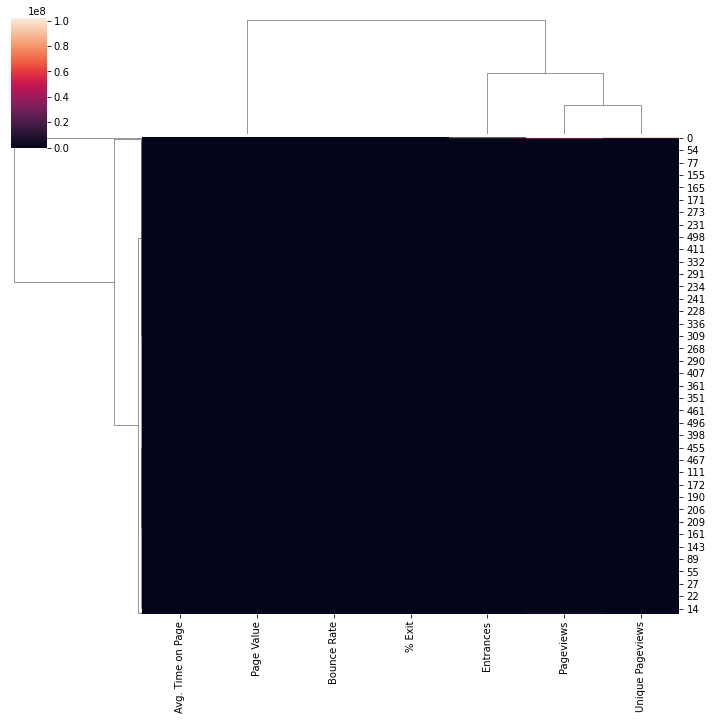

In [9]:
sns.clustermap(data)

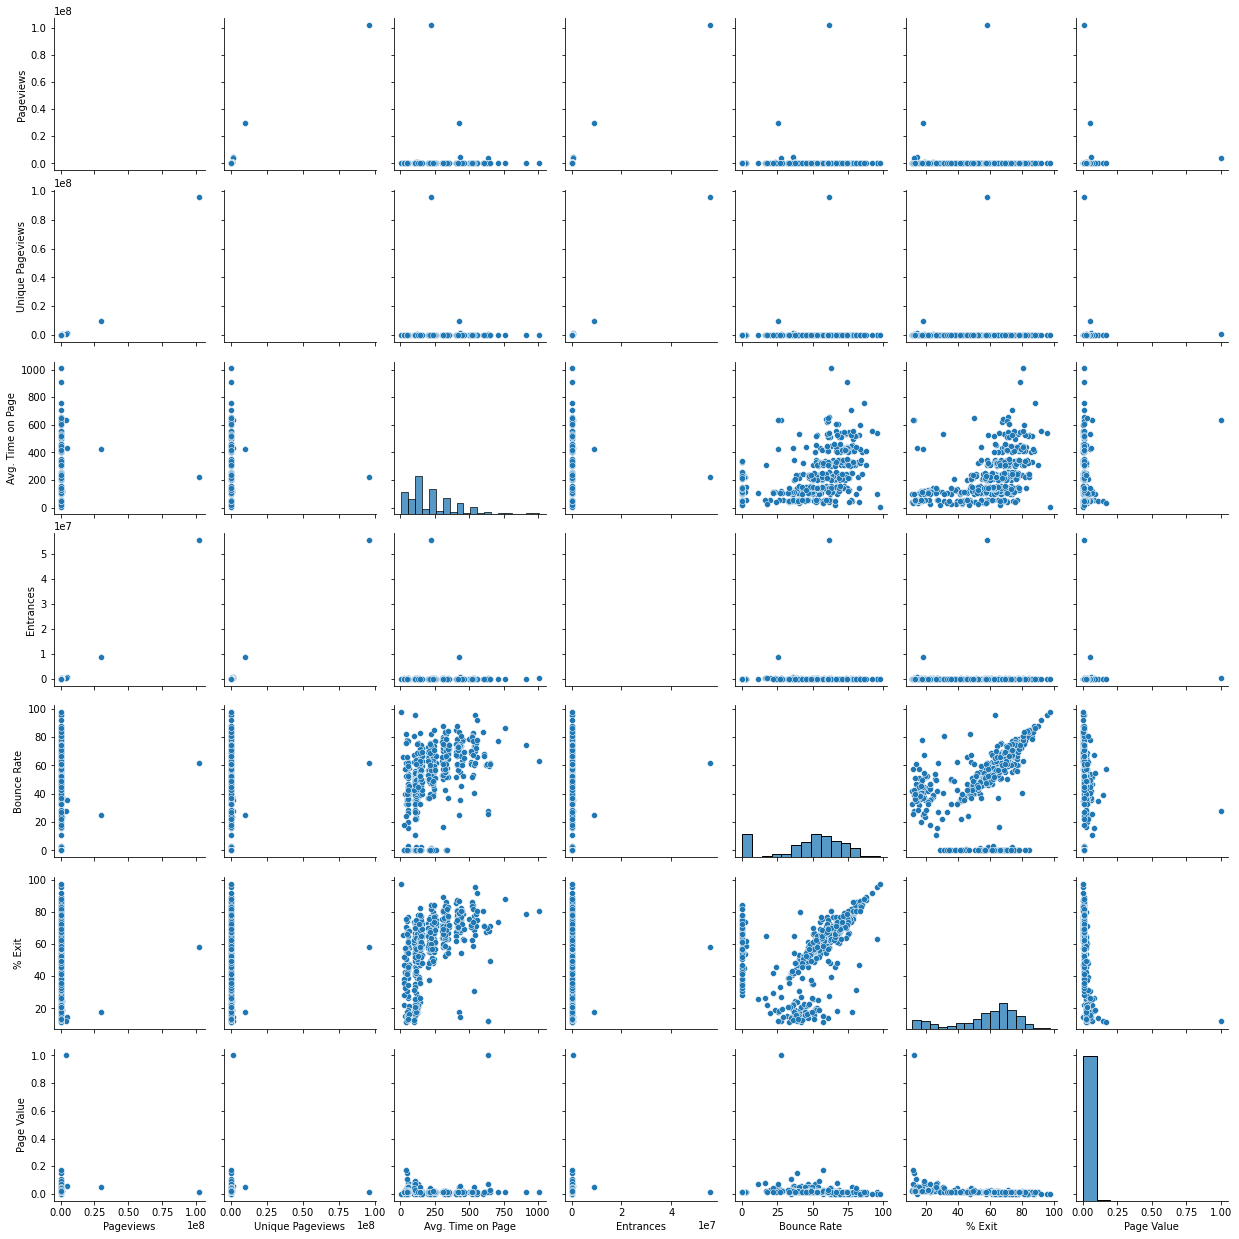

In [10]:
sns.pairplot(data)

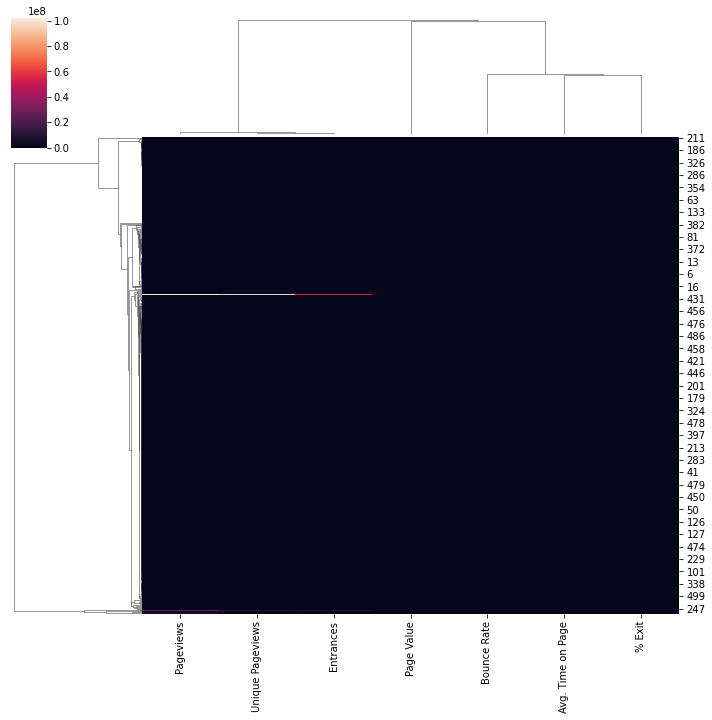

In [11]:
sns.clustermap(data, metric="correlation", method="single")

In [12]:
#df.isnull().sum()
features = ['Pageviews','Unique Pageviews','Avg. Time on Page','Entrances','Bounce Rate','% Exit','Page Value']

X = data[features]
#print(X.head())

z = StandardScaler()

X[features] = z.fit_transform(X)

EM = GaussianMixture(n_components = 5)
EM.fit(X)

cluster = EM.predict(X)
cluster

#print('SILHOUETTE: ',silhouette_score(X,cluster))

array([1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 3,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 3, 2, 0, 0, 2, 2, 4, 0, 2, 2, 3, 2, 3,
       2, 2, 4, 3, 2, 2, 2, 2, 0, 3, 2, 2, 0, 2, 3, 0, 2, 2, 2, 2, 2, 3,
       3, 0, 0, 0, 3, 2, 3, 0, 2, 2, 0, 2, 2, 2, 3, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 0, 0, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 2, 3, 2, 3, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 3,
       2, 3, 2, 2, 0, 3, 2, 2, 2, 3, 2, 0, 3, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 3, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       0, 0, 4, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2,
       2, 3, 2, 0, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 0, 3, 0, 0, 2, 3, 0, 2, 2, 2, 3, 2, 2,

In [13]:
print('SILHOUETTE: ',silhouette_score(X,cluster))

SILHOUETTE:  0.41047446117847125


<AxesSubplot:xlabel='Avg. Time on Page', ylabel='Page Value'>

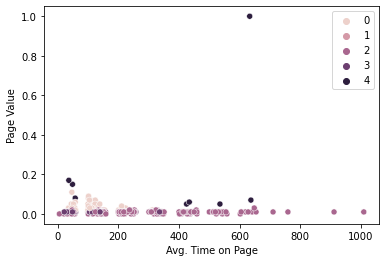

In [14]:
sns.scatterplot(x ='Avg. Time on Page',y = 'Page Value',hue = cluster, data= data  )

In [15]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
c = kmeans.predict(X)

In [16]:
print('SILHOUETTE: ',silhouette_score(X,c))

SILHOUETTE:  0.3849114943796452


In [17]:
kmeans.score(X)

-1375.0469073007853

In [18]:
k_range = range(1,5)
wcss = []

In [19]:
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(data)
    wcss.append(km.inertia_)

In [20]:
wcss

[2.367948410263553e+16,
 1077287122454894.9,
 44681321614989.42,
 3878817523343.9937]

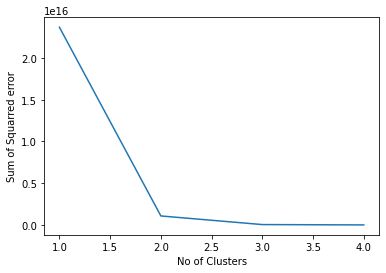

In [21]:
plt.xlabel('No of Clusters')
plt.ylabel('Sum of Squarred error')
plt.plot(k_range,wcss)

<AxesSubplot:>

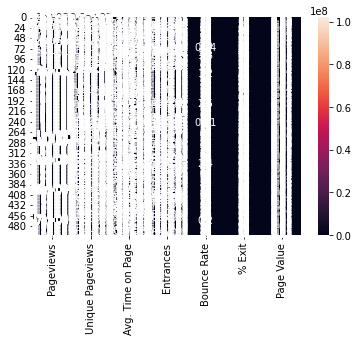

In [22]:
sns.heatmap(data, annot=True)

<AxesSubplot:>

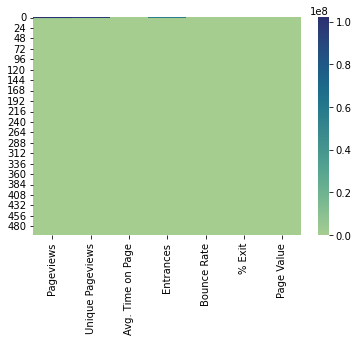

In [23]:
sns.heatmap(data, cmap='crest')

<AxesSubplot:>

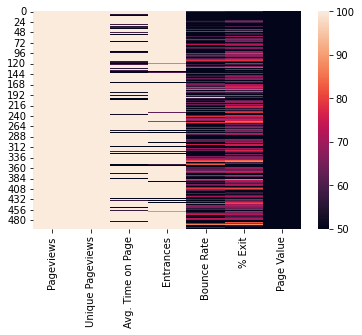

In [24]:
sns.heatmap(data, vmin=50, vmax=100)

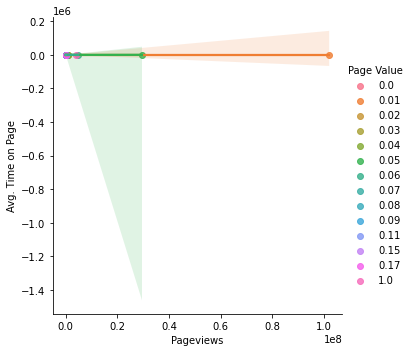

In [25]:
sns.lmplot(data=data, x="Pageviews", y='Avg. Time on Page', hue="Page Value")

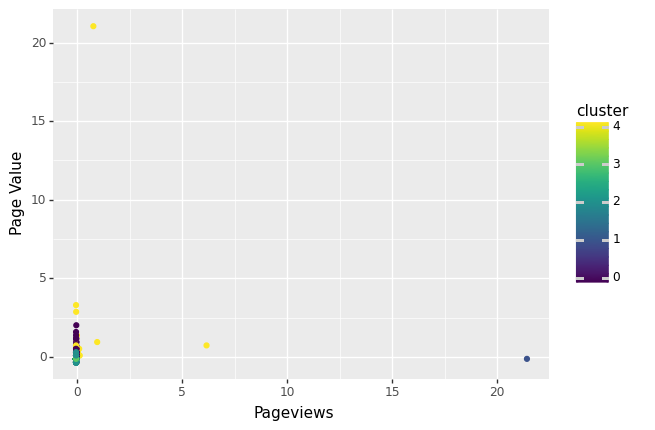

<ggplot: (135728263181)>

In [26]:
(ggplot(X, aes(x = 'Pageviews',y = 'Page Value', color = 'cluster')) + geom_point())

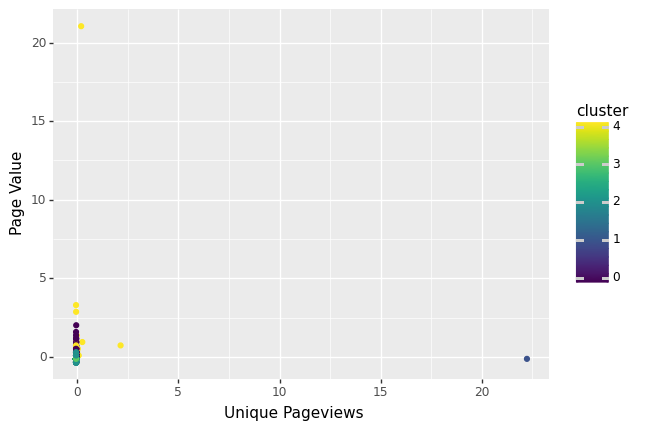

<ggplot: (135728255799)>

In [27]:
(ggplot(X, aes(x = 'Unique Pageviews',y = 'Page Value', color = 'cluster')) + geom_point())

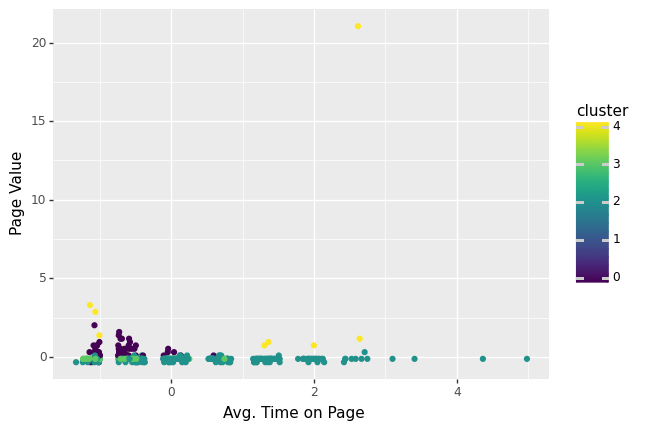

<ggplot: (135728322844)>

In [28]:
(ggplot(X, aes(x = 'Avg. Time on Page',y = 'Page Value', color = 'cluster')) + geom_point())

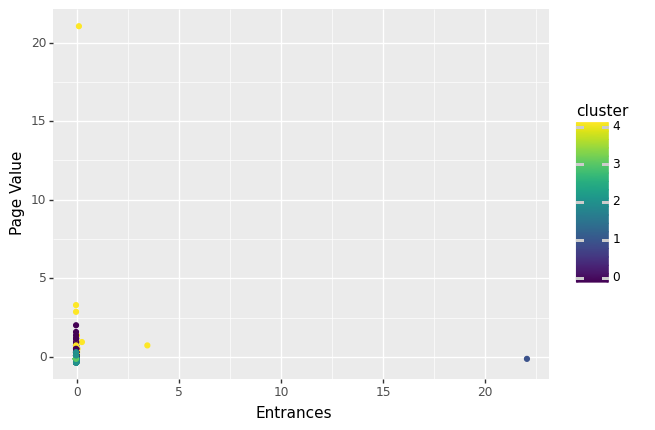

<ggplot: (135728399776)>

In [29]:
(ggplot(X, aes(x = 'Entrances',y = 'Page Value', color = 'cluster')) + geom_point())

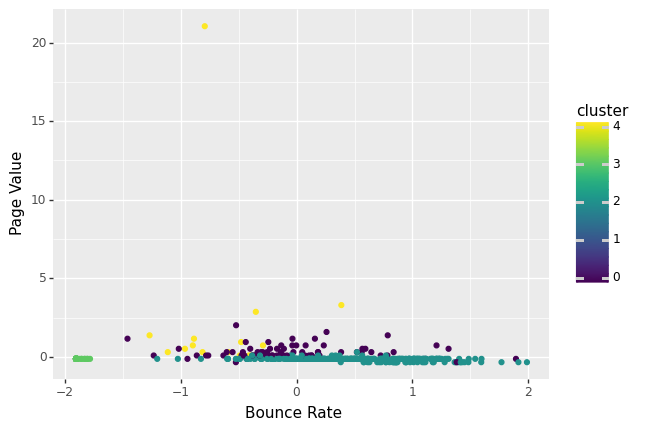

<ggplot: (135728530695)>

In [30]:
(ggplot(X, aes(x = 'Bounce Rate',y = 'Page Value', color = 'cluster')) + geom_point())

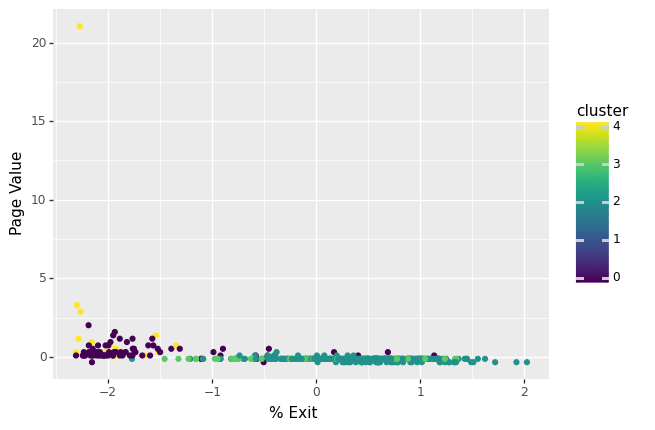

<ggplot: (135728573980)>

In [31]:
(ggplot(X, aes(x = '% Exit',y = 'Page Value', color = 'cluster')) + geom_point())

In [32]:
#X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
#plt.scatter(X[:,0], X[:,1])

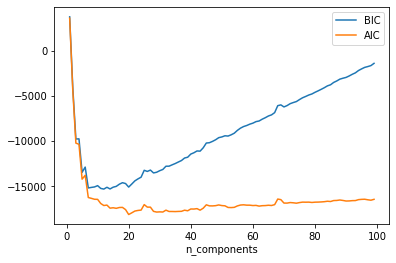

In [33]:
n_components = np.arange(1, 100)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [34]:
"""gmm = GaussianMixture(n_components=4)
gmm.fit(X)
labels = gmm.predict(X)
plt.scatter(X, c=labels, cmap='viridis');"""

"gmm = GaussianMixture(n_components=4)\ngmm.fit(X)\nlabels = gmm.predict(X)\nplt.scatter(X, c=labels, cmap='viridis');"

In [35]:
#plt.scatter(X[:,0,:],0, X[:,1,:])

In [36]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X)

#predictions from gmm
labels = gmm.predict(X)
frame = pd.DataFrame(X)
frame['cluster'] = labels
frame.columns = ['Pageviews','Unique Pageviews','Avg. Time on Page','Entrances','Bounce Rate','% Exit','Page Value', 'cluster']

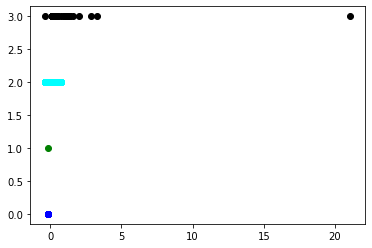

In [37]:
color=['blue','green','cyan', 'black','red','purple','teal']
colors = np.random.rand(1502)
for k in range(0,7):
    dat = frame[frame["cluster"]==k]
    plt.scatter(dat["Page Value"],dat["cluster"],c=color[k])
plt.show()

# Kmeans


In [38]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
c = kmeans.predict(X)

In [39]:
print('SILHOUETTE: ',silhouette_score(X,c))

SILHOUETTE:  0.36851079285410493


In [40]:
kmeans.score(X)

-1665.3158287457163

In [41]:
k_range = range(1,5)
wcss = []

In [42]:
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(data)
    wcss.append(km.inertia_)

In [43]:
wcss

[2.367948410263553e+16,
 1077287122454894.9,
 44681321614989.42,
 3878817523343.9937]

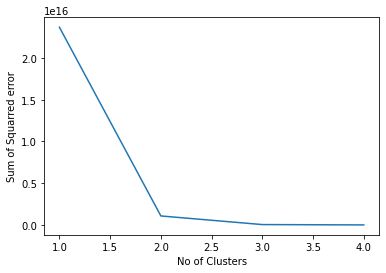

In [44]:
plt.xlabel('No of Clusters')
plt.ylabel('Sum of Squarred error')
plt.plot(k_range,wcss)

# Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
inputs = ['Pageviews','Unique Pageviews','Avg. Time on Page','Entrances','Bounce Rate','% Exit']
target = ['Page Value']
A = data[inputs]
B = data[target]
LR = reg.fit(A,B)


In [46]:
LR.score(A,B)

0.5197008284447068

In [47]:
LR.intercept_

array([0.02589687])

In [48]:
LR.singular_

array([1.53277805e+08, 1.35823547e+07, 9.58213778e+05, 3.56044592e+03,
       4.76357737e+02, 3.54459994e+02])

In [49]:
ab =LR.coef_
ab

array([[ 1.09873389e-07,  2.55883062e-07,  3.10986539e-05,
        -6.45637574e-07,  5.42014918e-05, -3.81447487e-04]])

In [50]:
#sns.regplot(x=A, y=B, data=data)
abc = data.corr()

<AxesSubplot:>

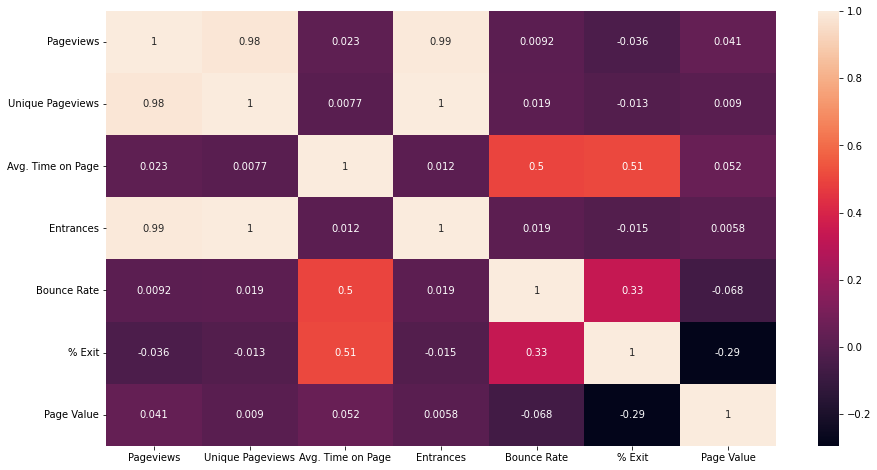

In [51]:
plt.figure(figsize = (15,8))
sns.heatmap(abc, annot = True)
#plt.savefig("Corelation Plot.png", dpi= 600)


# PyCaret

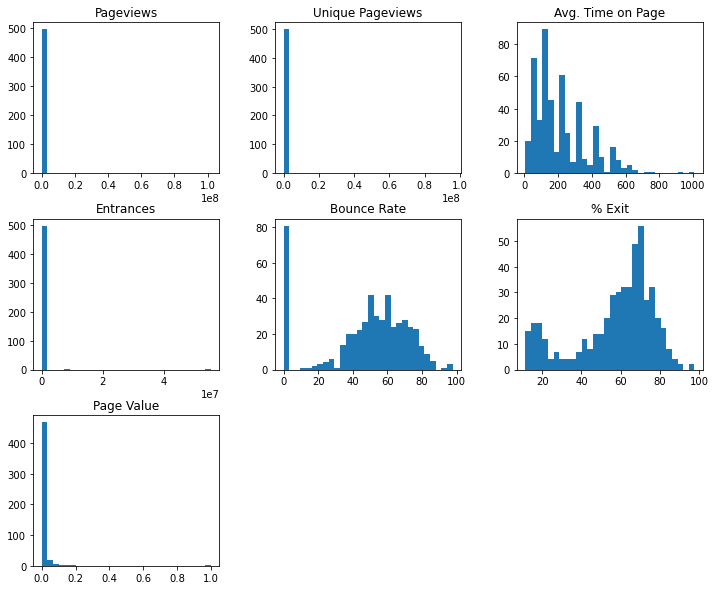

<Figure size 432x288 with 0 Axes>

In [52]:
#from pycaret.clustering import *
data.hist(bins = 30, figsize = (12,10), grid = False)
plt.show()
plt.savefig("Histogram of Data.png", dpi=600)

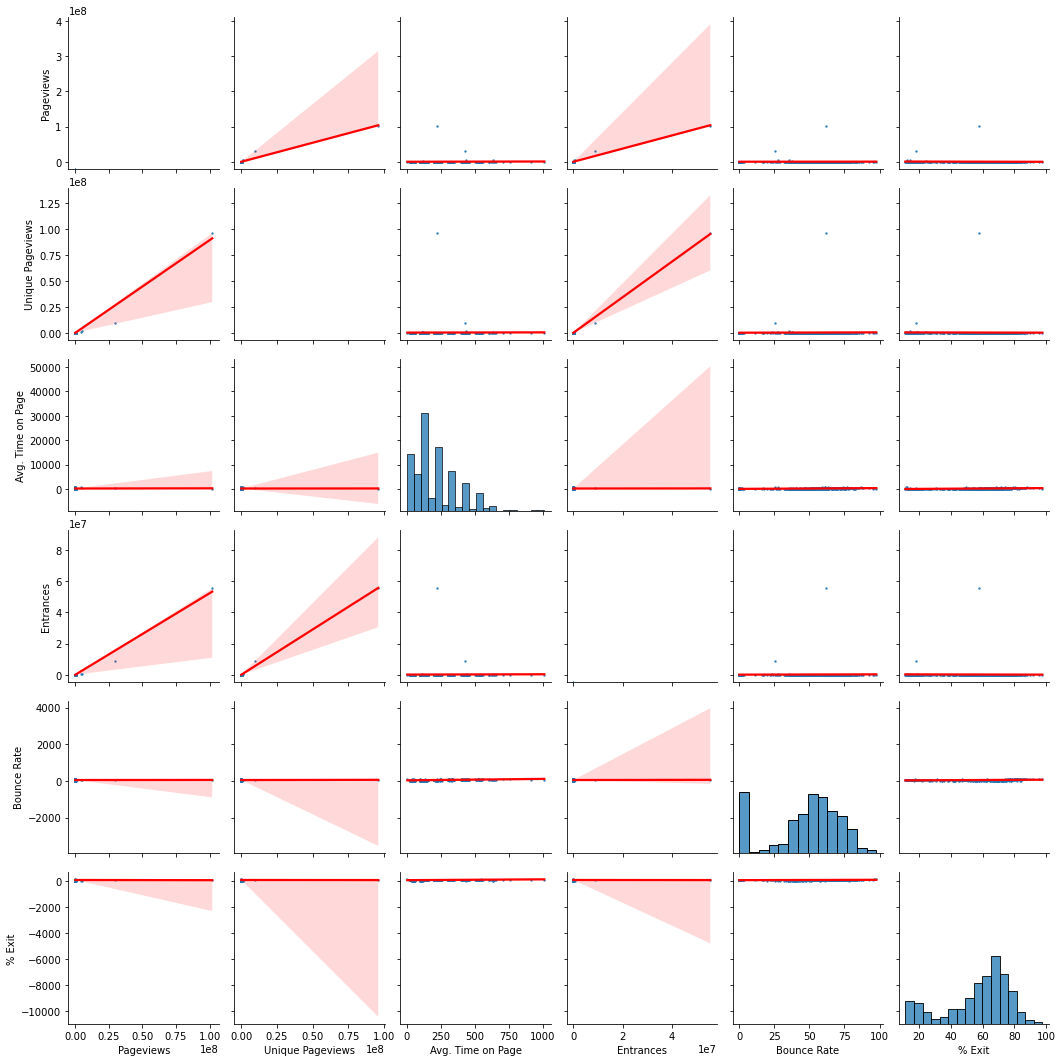

In [53]:
#from pycaret.clustering import *
plot_kws = {'scatter_kws': {'s': 2}, 'line_kws': {'color': 'red'}}
sns.pairplot(data, kind='reg', vars=data.columns[:-1], plot_kws=plot_kws)
plt.show()

In [54]:
from pycaret.clustering import *
clust = setup(data,normalize = True)

# Kmeans

In [55]:
model = create_model('kmeans')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

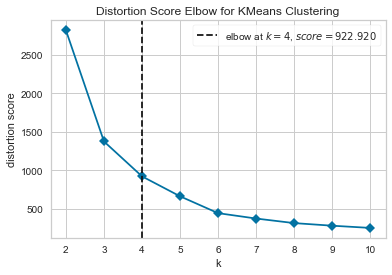

In [56]:
plot_model(model, 'elbow')

In [57]:
print(model)

KMeans(n_clusters=4, random_state=6775)


In [58]:
plot_model(model, 'cluster')

In [59]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [60]:
assign_model(model)

Pageviews  Unique Pageviews  Avg. Time on Page   Entrances  \
0    101970728.0        95984128.0              221.0  55403208.0   
1     29515324.0         9488672.0              425.0   8763470.0   
2      4790426.0         1343430.0              434.0    722376.0   
3      3927273.0         1094822.0              633.0    354092.0   
4       845531.0          570445.0              122.0    119162.0   
..           ...               ...                ...         ...   
495       6637.0            6290.0              911.0      5874.0   
496       6632.0            6422.0              309.0      6291.0   
497       6632.0            5880.0              648.0      1679.0   
498       6631.0            6590.0              140.0        40.0   
499       6630.0            6070.0              237.0      3929.0   

     Bounce Rate     % Exit  Page Value    Cluster  
0      61.799999  57.919998        0.01  Cluster 3  
1      25.299999  17.809999        0.05  Cluster 0  
2      35.759998  14.400000        0.06  Cluster 0  
3      27.889999  12.110000        1.00  Cluster 2  
4      37.459999  24.549999        0.02  Cluster 0  
..           ...        ...         ...        ...  
495    74.239998  78.970001        0.01  Cluster 1  
496    60.689999  69.470001        0.01  Cluster 1  
497    60.860001  49.759998        0.03  Cluster 1  
498     0.000000  78.180000        0.01  Cluster 0  
499    48.910000  49.259998        0.02  Cluster 0  

[500 rows x 8 columns]

In [61]:
predict_model(model, data = data)

Pageviews  Unique Pageviews  Avg. Time on Page  Entrances  Bounce Rate  \
0    21.420130         22.225817           0.022216  22.061798     0.558385   
1     6.154143          2.147660           1.306086   3.441964    -0.895896   
2     0.944733          0.256909           1.362728   0.231744    -0.479135   
3     0.762871          0.199199           2.615131   0.084715    -0.792702   
4     0.113563          0.077476          -0.600839  -0.009075    -0.411401   
..         ...               ...                ...        ...          ...   
495  -0.063188         -0.053481           4.364719  -0.054303     1.054036   
496  -0.063189         -0.053451           0.576042  -0.054136     0.514159   
497  -0.063189         -0.053576           2.709533  -0.055977     0.520932   
498  -0.063189         -0.053412          -0.487556  -0.056632    -1.903932   
499  -0.063189         -0.053532           0.122912  -0.055079     0.044805   

       % Exit  Page Value    Cluster  
0    0.027863   -0.128294  Cluster 3  
1   -1.986843    0.727000  Cluster 0  
2   -2.158126    0.940824  Cluster 0  
3   -2.273152   21.040249  Cluster 2  
4   -1.648296    0.085529  Cluster 0  
..        ...         ...        ...  
495  1.085195   -0.128294  Cluster 1  
496  0.608014   -0.128294  Cluster 1  
497 -0.382010    0.299353  Cluster 1  
498  1.045514   -0.128294  Cluster 0  
499 -0.407125    0.085529  Cluster 0  

[500 rows x 8 columns]

# Birch Clustering

In [62]:
birch =  create_model('birch')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [63]:
print(birch)

Birch(n_clusters=4)


In [64]:
evaluate_model(birch)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Spectral Clustering

In [65]:
sc = create_model('sc')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [66]:
print(sc)

SpectralClustering(n_clusters=4, n_jobs=-1, random_state=6775)


In [67]:
evaluate_model(sc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [68]:
assign_model(sc)

Pageviews  Unique Pageviews  Avg. Time on Page   Entrances  \
0    101970728.0        95984128.0              221.0  55403208.0   
1     29515324.0         9488672.0              425.0   8763470.0   
2      4790426.0         1343430.0              434.0    722376.0   
3      3927273.0         1094822.0              633.0    354092.0   
4       845531.0          570445.0              122.0    119162.0   
..           ...               ...                ...         ...   
495       6637.0            6290.0              911.0      5874.0   
496       6632.0            6422.0              309.0      6291.0   
497       6632.0            5880.0              648.0      1679.0   
498       6631.0            6590.0              140.0        40.0   
499       6630.0            6070.0              237.0      3929.0   

     Bounce Rate     % Exit  Page Value    Cluster  
0      61.799999  57.919998        0.01  Cluster 0  
1      25.299999  17.809999        0.05  Cluster 0  
2      35.759998  14.400000        0.06  Cluster 0  
3      27.889999  12.110000        1.00  Cluster 1  
4      37.459999  24.549999        0.02  Cluster 0  
..           ...        ...         ...        ...  
495    74.239998  78.970001        0.01  Cluster 0  
496    60.689999  69.470001        0.01  Cluster 0  
497    60.860001  49.759998        0.03  Cluster 0  
498     0.000000  78.180000        0.01  Cluster 0  
499    48.910000  49.259998        0.02  Cluster 0  

[500 rows x 8 columns]

# Density-Based Spatial Clustering

In [69]:
dbscan = create_model('dbscan')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [70]:
print(dbscan)

DBSCAN(n_jobs=-1)


In [71]:
evaluate_model(dbscan)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [72]:
#plt.figure(15,18)
plot_model(dbscan,'distribution', label = True, feature = 'Unique Pageviews')
plt.savefig("Distribution Plot.png", dpi = 600)


<Figure size 432x288 with 0 Axes>

In [74]:
'''plot_model(dbscan, plot = 'distribution', feature = 'class')'''

"plot_model(dbscan, plot = 'distribution', feature = 'class')"

In [23]:
assign_model(dbscan).to_csv('dbscanout.csv')


# OPTICS Clustering

In [75]:
optics = create_model("optics")

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [76]:
print(optics)

OPTICS(n_jobs=-1)


In [77]:
evaluate_model(optics)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [78]:
assign_model(optics)

Pageviews  Unique Pageviews  Avg. Time on Page   Entrances  \
0    101970728.0        95984128.0              221.0  55403208.0   
1     29515324.0         9488672.0              425.0   8763470.0   
2      4790426.0         1343430.0              434.0    722376.0   
3      3927273.0         1094822.0              633.0    354092.0   
4       845531.0          570445.0              122.0    119162.0   
..           ...               ...                ...         ...   
495       6637.0            6290.0              911.0      5874.0   
496       6632.0            6422.0              309.0      6291.0   
497       6632.0            5880.0              648.0      1679.0   
498       6631.0            6590.0              140.0        40.0   
499       6630.0            6070.0              237.0      3929.0   

     Bounce Rate     % Exit  Page Value     Cluster  
0      61.799999  57.919998        0.01  Cluster -1  
1      25.299999  17.809999        0.05  Cluster -1  
2      35.759998  14.400000        0.06  Cluster -1  
3      27.889999  12.110000        1.00  Cluster -1  
4      37.459999  24.549999        0.02  Cluster -1  
..           ...        ...         ...         ...  
495    74.239998  78.970001        0.01  Cluster -1  
496    60.689999  69.470001        0.01  Cluster 11  
497    60.860001  49.759998        0.03  Cluster -1  
498     0.000000  78.180000        0.01  Cluster -1  
499    48.910000  49.259998        0.02  Cluster -1  

[500 rows x 8 columns]

# Agglomerative Clustering

In [79]:
hclust = create_model('hclust')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [80]:
print(hclust)

AgglomerativeClustering(n_clusters=4)


In [81]:
evaluate_model(hclust)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [82]:
assign_model(hclust)

Pageviews  Unique Pageviews  Avg. Time on Page   Entrances  \
0    101970728.0        95984128.0              221.0  55403208.0   
1     29515324.0         9488672.0              425.0   8763470.0   
2      4790426.0         1343430.0              434.0    722376.0   
3      3927273.0         1094822.0              633.0    354092.0   
4       845531.0          570445.0              122.0    119162.0   
..           ...               ...                ...         ...   
495       6637.0            6290.0              911.0      5874.0   
496       6632.0            6422.0              309.0      6291.0   
497       6632.0            5880.0              648.0      1679.0   
498       6631.0            6590.0              140.0        40.0   
499       6630.0            6070.0              237.0      3929.0   

     Bounce Rate     % Exit  Page Value    Cluster  
0      61.799999  57.919998        0.01  Cluster 3  
1      25.299999  17.809999        0.05  Cluster 0  
2      35.759998  14.400000        0.06  Cluster 0  
3      27.889999  12.110000        1.00  Cluster 1  
4      37.459999  24.549999        0.02  Cluster 0  
..           ...        ...         ...        ...  
495    74.239998  78.970001        0.01  Cluster 2  
496    60.689999  69.470001        0.01  Cluster 2  
497    60.860001  49.759998        0.03  Cluster 2  
498     0.000000  78.180000        0.01  Cluster 0  
499    48.910000  49.259998        0.02  Cluster 2  

[500 rows x 8 columns]

# Mean shift Clustering

In [83]:
meanshift = create_model('meanshift')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [84]:
print(meanshift)

MeanShift(n_jobs=-1)


In [85]:
evaluate_model(meanshift)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [86]:
assign_model(meanshift)

Pageviews  Unique Pageviews  Avg. Time on Page   Entrances  \
0    101970728.0        95984128.0              221.0  55403208.0   
1     29515324.0         9488672.0              425.0   8763470.0   
2      4790426.0         1343430.0              434.0    722376.0   
3      3927273.0         1094822.0              633.0    354092.0   
4       845531.0          570445.0              122.0    119162.0   
..           ...               ...                ...         ...   
495       6637.0            6290.0              911.0      5874.0   
496       6632.0            6422.0              309.0      6291.0   
497       6632.0            5880.0              648.0      1679.0   
498       6631.0            6590.0              140.0        40.0   
499       6630.0            6070.0              237.0      3929.0   

     Bounce Rate     % Exit  Page Value    Cluster  
0      61.799999  57.919998        0.01  Cluster 2  
1      25.299999  17.809999        0.05  Cluster 3  
2      35.759998  14.400000        0.06  Cluster 1  
3      27.889999  12.110000        1.00  Cluster 4  
4      37.459999  24.549999        0.02  Cluster 0  
..           ...        ...         ...        ...  
495    74.239998  78.970001        0.01  Cluster 1  
496    60.689999  69.470001        0.01  Cluster 0  
497    60.860001  49.759998        0.03  Cluster 1  
498     0.000000  78.180000        0.01  Cluster 0  
499    48.910000  49.259998        0.02  Cluster 0  

[500 rows x 8 columns]

# Affinity Propagation

In [87]:
ap = create_model('ap')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [88]:
print(ap)

AffinityPropagation()


In [89]:
evaluate_model(ap)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [90]:
assign_model(ap)

Pageviews  Unique Pageviews  Avg. Time on Page   Entrances  \
0    101970728.0        95984128.0              221.0  55403208.0   
1     29515324.0         9488672.0              425.0   8763470.0   
2      4790426.0         1343430.0              434.0    722376.0   
3      3927273.0         1094822.0              633.0    354092.0   
4       845531.0          570445.0              122.0    119162.0   
..           ...               ...                ...         ...   
495       6637.0            6290.0              911.0      5874.0   
496       6632.0            6422.0              309.0      6291.0   
497       6632.0            5880.0              648.0      1679.0   
498       6631.0            6590.0              140.0        40.0   
499       6630.0            6070.0              237.0      3929.0   

     Bounce Rate     % Exit  Page Value     Cluster  
0      61.799999  57.919998        0.01   Cluster 0  
1      25.299999  17.809999        0.05   Cluster 1  
2      35.759998  14.400000        0.06  Cluster 17  
3      27.889999  12.110000        1.00   Cluster 2  
4      37.459999  24.549999        0.02  Cluster 20  
..           ...        ...         ...         ...  
495    74.239998  78.970001        0.01  Cluster 23  
496    60.689999  69.470001        0.01  Cluster 19  
497    60.860001  49.759998        0.03   Cluster 8  
498     0.000000  78.180000        0.01  Cluster 18  
499    48.910000  49.259998        0.02  Cluster 14  

[500 rows x 8 columns]

In [91]:
import plotly.express as px

In [92]:
import pandas as pd
rf = pd.read_csv('dbscanout.csv')
rf.head()

Unnamed: 0    Pageviews  Unique Pageviews  Avg. Time on Page   Entrances  \
0           0  101970730.0        95984130.0              221.0  55403210.0   
1           1   29515324.0         9488672.0              425.0   8763470.0   
2           2    4790426.0         1343430.0              434.0    722376.0   
3           3    3927273.0         1094822.0              633.0    354092.0   
4           4     845531.0          570445.0              122.0    119162.0   

   Bounce Rate  % Exit  Page Value     Cluster  
0        61.80   57.92        0.01  Cluster -1  
1        25.30   17.81        0.05  Cluster -1  
2        35.76   14.40        0.06  Cluster -1  
3        27.89   12.11        1.00  Cluster -1  
4        37.46   24.55        0.02   Cluster 0

In [93]:
px.bar(data_frame = rf[rf.Cluster=='Cluster -1'], x = 'Avg. Time on Page', y = 'Page Value')

In [94]:
px.bar(data_frame = rf[rf.Cluster=='Cluster -1'], x = 'Unique Pageviews', y = 'Page Value')

In [95]:
px.histogram(data_frame = rf[rf.Cluster=='Cluster -1'],y = 'Page Value', x = 'Unique Pageviews', color = 'Unique Pageviews')

In [96]:
px.histogram(data_frame = rf[rf.Cluster=='Cluster 0'],x = 'Page Value', y = 'Unique Pageviews', color = 'Unique Pageviews')

In [97]:
rf.Cluster.unique()

array(['Cluster -1', 'Cluster 0', 'Cluster 1', 'Cluster 2'], dtype=object)

In [98]:
px.histogram(data_frame = rf[rf.Cluster=='Cluster 1'],x = 'Page Value', y = 'Unique Pageviews', color = 'Unique Pageviews')

In [99]:
px.histogram(data_frame = rf[rf.Cluster=='Cluster 2'],x = 'Page Value', y = 'Unique Pageviews', color = 'Unique Pageviews')

In [100]:
px.histogram(data_frame = rf[rf.Cluster=='Cluster 2'],y = 'Page Value', x = 'Unique Pageviews', color = 'Cluster')

In [101]:
fig = px.bar(rf, x="Avg. Time on Page", y="Page Value", color="Cluster", barmode="group", title = 'Bar Plot')
fig.show()
fig.write_image('Bar Plot avg.png',scale = 3)

In [102]:
fig = px.bar(rf, x="Pageviews", y="Page Value", color="Cluster", barmode="group", title = 'Bar Plot for Pageviews')
fig.show()
fig.write_image('Bar Plot pageviews.png',scale = 3)

In [103]:
fig = px.bar(rf, x="Cluster", y="Page Value", color="Unique Pageviews", barmode="group", title = 'Bar Plot for Unique Pageviews')
fig.show()
fig.write_image('Bar Plot Unique.png',scale = 3)
'''Unique Pageviews	Avg. Time on Page	Entrances	Bounce Rate	% Exit	Page Value	Cluster'''

'Unique Pageviews\tAvg. Time on Page\tEntrances\tBounce Rate\t% Exit\tPage Value\tCluster'

In [104]:
fig = px.bar(rf, x="Cluster", y="Page Value", color="Entrances", barmode="group", title = 'Bar Plot')
fig.show()
fig.write_image('Bar Plot Entrances.png',scale = 3)
'''Unique Pageviews	Avg. Time on Page	Entrances	Bounce Rate	% Exit	Page Value	Cluster'''

'Unique Pageviews\tAvg. Time on Page\tEntrances\tBounce Rate\t% Exit\tPage Value\tCluster'

In [105]:
fig = px.bar(rf, x="Cluster", y="Bounce Rate", color="Page Value", barmode="group", title = 'Bar Plot')
fig.show()
#fig.write_image('Bar Plot Bounce Rate.png',scale = 3)
'''Unique Pageviews	Avg. Time on Page	Entrances	Bounce Rate	% Exit	Page Value	Cluster'''

'Unique Pageviews\tAvg. Time on Page\tEntrances\tBounce Rate\t% Exit\tPage Value\tCluster'

In [106]:
fig = px.bar(rf, x="Cluster", y="Page Value", color="% Exit", barmode="group", title = 'Bar Plot')
fig.show()
fig.write_image('Bar Plot exit.png',scale = 3)
'''Unique Pageviews	Avg. Time on Page	Entrances	Bounce Rate	% Exit	Page Value	Cluster'''

'Unique Pageviews\tAvg. Time on Page\tEntrances\tBounce Rate\t% Exit\tPage Value\tCluster'

In [107]:
'''fig = px.bar_polar(rf, r="Cluster", theta="Page Value", color="Bounce Rate", template="plotly_dark",
            color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show() y="Page Value", orientation="h",

fig = px.ecdf(rf, x="Cluster", color="Avg. Time on Page")
fig.show()'''
fig = px.treemap(rf, path=[px.Constant('Unique Pageviews'), 'Avg. Time on Page', '% Exit'], values='Page Value',
                  color='Cluster', hover_data=['Pageviews'])
fig.show()
fig.write_image('Tree Map.png',scale = 3)

In [108]:
fig = px.treemap(rf, path=[px.Constant('Avg. Time on Page'), 'Unique Pageviews', '% Exit'], values='Page Value',
                  color='Cluster', hover_data=['Pageviews'])
fig.show()
fig.write_image('Tree Map2.png',scale = 3)

In [109]:
fig = px.treemap(rf, path=[px.Constant('Pageviews'), 'Unique Pageviews', '% Exit'], values='Page Value',
                  color='Cluster', hover_data=['Pageviews'])
fig.show()
fig.write_image('Tree Map3.png',scale = 3)

In [111]:
'''Compare = compare_models()'''

'Compare = compare_models()'

In [112]:
models()

Name  \
ID                                            
kmeans                   K-Means Clustering   
ap                     Affinity Propagation   
meanshift             Mean Shift Clustering   
sc                      Spectral Clustering   
hclust             Agglomerative Clustering   
dbscan     Density-Based Spatial Clustering   
optics                    OPTICS Clustering   
birch                      Birch Clustering   

                                                   Reference  
ID                                                            
kmeans                        sklearn.cluster._kmeans.KMeans  
ap         sklearn.cluster._affinity_propagation.Affinity...  
meanshift              sklearn.cluster._mean_shift.MeanShift  
sc              sklearn.cluster._spectral.SpectralClustering  
hclust     sklearn.cluster._agglomerative.AgglomerativeCl...  
dbscan                        sklearn.cluster._dbscan.DBSCAN  
optics                        sklearn.cluster._optics.OPTICS  
birch                           sklearn.cluster._birch.Birch

In [113]:
get_metrics()

Name       Display Name  \
ID                                                  
silhouette          Silhouette         Silhouette   
chs          Calinski-Harabasz  Calinski-Harabasz   
db              Davies-Bouldin     Davies-Bouldin   
hs           Homogeneity Score        Homogeneity   
ari                 Rand Index         Rand Index   
cs          Completeness Score       Completeness   

                                               Score Function  \
ID                                                              
silhouette  <function silhouette_score at 0x000001F9D04C6B80>   
chs         <function calinski_harabasz_score at 0x000001F...   
db          <function davies_bouldin_score at 0x000001F9D0...   
hs          <function homogeneity_score at 0x000001F9D049C...   
ari         <function adjusted_rand_score at 0x000001F9D04...   
cs          <function completeness_score at 0x000001F9D049...   

                                          Scorer Target Args  \
ID                                                             
silhouette         make_scorer(silhouette_score)   pred   {}   
chs         make_scorer(calinski_harabasz_score)   pred   {}   
db             make_scorer(davies_bouldin_score)   pred   {}   
hs                make_scorer(homogeneity_score)   pred   {}   
ari             make_scorer(adjusted_rand_score)   pred   {}   
cs               make_scorer(completeness_score)   pred   {}   

            Greater is Better  Needs Ground Truth  Custom  
ID                                                         
silhouette               True               False   False  
chs                      True               False   False  
db                       True               False   False  
hs                       True                True   False  
ari                      True                True   False  
cs                       True                True   False